<a href="https://colab.research.google.com/github/AbhishekBadoni101/KNN-Machine-Learning/blob/master/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('glass.csv')


In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
x = data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values
y = data['Type'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_test.size

387

In [ ]:
x_train.size

1539

In [ ]:
###### determining K-Value
import numpy as np
k = np.sqrt(len(x_train))/2
k = int(np.round(k))
if k%2==0:
   k = k+1
k  



7

In [ ]:
######## initializing the algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)

In [ ]:
########## fitting the values
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(x_test)
y_pred


array([2, 2, 1, 1, 1, 1, 1, 3, 6, 1, 1, 1, 1, 5, 1, 6, 1, 7, 1, 5, 2, 2,
       1, 1, 1, 1, 5, 1, 2, 5, 2, 2, 1, 1, 2, 3, 1, 2, 7, 7, 1, 1, 1])

In [ ]:
y_pred.shape

(43,)

In [ ]:
y_test.shape

(43,)

In [ ]:
df = pd.DataFrame()
df['Actual Value'] = y_test
df['Predicted Value'] = y_pred
df


,Actual Value,Predicted Value
0,2,2
1,2,2
2,1,1
3,2,1
4,2,1
5,1,1
6,1,1
7,1,3
8,2,6
9,3,1


In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,y_pred)
a


0.6744186046511628

In [ ]:
error = 1 - a
error

0.32558139534883723

In [ ]:
error = []
accuracy = []
for i in range(1,50):
  model = KNeighborsClassifier(n_neighbors= i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  a = accuracy_score(y_test,y_pred)
  accuracy.append(a)
  error.append(1-a)
  

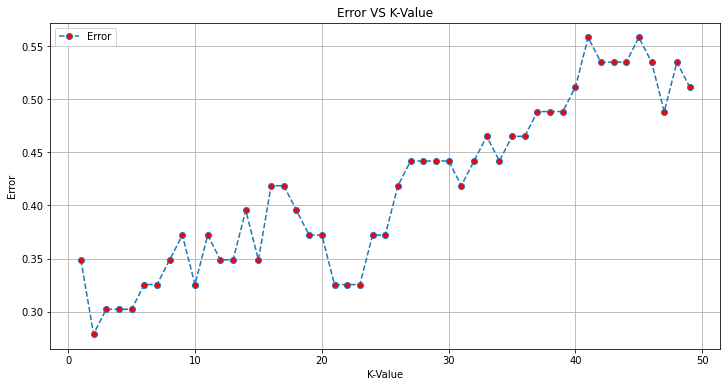

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,linestyle = 'dashed', marker='o',markerfacecolor ='red',label='Error' )
plt.title('Error VS K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error')
plt.grid()
plt.legend(loc=2)
plt.show()
plt.savefig('Glass Error VS K-Value.jpg')

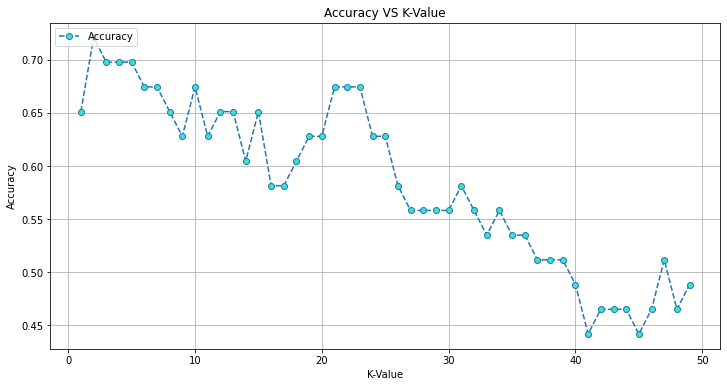

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),accuracy,linestyle = 'dashed', marker='o',markerfacecolor ='turquoise',label='Accuracy' )
plt.title('Accuracy VS K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc=2)
plt.show()
plt.savefig('Glass Accuracy VS K-Value.jpg')
